# 2.1.1.	Synthetic - Magnetic Data Response#


## Magnetic response of a simple geologic model


![synthmodel](./images/SyntheticModel.png)

The magnetic response (total field anomaly) of the geologic model is calculated on a series of east-west flight lines running roughly perpendicular to the general strike of geologic boundaries and structures featured in the model. Flight line spacing is 200 m. Data was collected at a flight height of 40 m. Topography is assumed to be flat in this example. 

An east-west profile through the magnetic data is shown below. The magnetic data are in nanoteslas (nT). The profile location can be changed using the slider bars, and the number of sampling points can be varied.

The responses of the smaller and larger magnetic blocks are obvious in the profile, and occur directly over the sources (due to the magnetic field inclination being vertical in this example). The fault within the large eastern magnetic block is observed as a more subtle dip in the magnetic response.



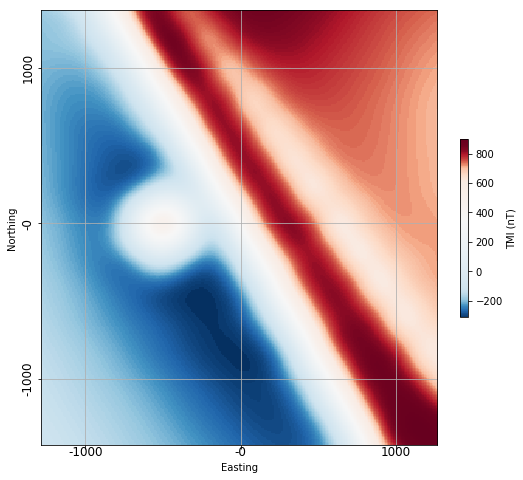

In [4]:
## Load all libraries and setup the synthetic problem
from library.Mag import Mag, ProblemSetter, MathUtils, Simulator, DataIO


# Load data and topo and build default model
workDir = './assets/Synthetic/'
fName = 'DataGrid.tiff'

dataGrid = DataIO.loadGeoTiffFile(workDir+fName, plotIt=True)

In [5]:
param = Simulator.ViewMagSurveyWidget(dataGrid)
display(param)

interactive(children=(FloatSlider(value=-10.036722527700476, continuous_update=False, description='East', max=2539.9632774722995, min=-2560.0367225277005, step=10.0), FloatSlider(value=-28.5773809524253, continuous_update=False, description='North', max=2771.4226190475747, min=-2828.5773809524253, step=10.0), FloatSlider(value=90.0, continuous_update=False, description='Azimuth', max=180.0, step=5.0), FloatSlider(value=1893.5746618499097, continuous_update=False, description='Length', max=3787.1493236998194, min=20.0, step=20.0), BoundedFloatText(value=100.0, description='Sampling', max=1000.0, min=10.0, step=5.0), Output()), _dom_classes=('widget-interact',))

## Magnetic field effect on response

As discussed in Section 1 on the Toolkit website (Magnetic Data - Background), the magnetic response will depend on the inclination, declination, and field strength of the magnetic field at the survey location. Use the drop down menu below, which looks like this, ![location_drop](./images/location_dropdown2_20per_ppt.png) to explore the range of responses (Total Magnetic Intensity) that would be measured if this same geologic (and magnetic rock properties) scenario existed at different locations on Earth (sites represent current Mineral Deposit Research Unit project sites, plus other locations to provide coverage). The red arrow at the bottom: ![inc_dec_arrow](./images/arrow_location_10per_ppt.png) illustrates the inclination and declination of the chosen location. 
Notice how data collected at very low latitudes near the magnetic equator (e.g. Chile and Peru locations) show magnetic anomlies offset significantly from their source due to the near-horizontal magnetic inclinations existing at these locations. TMI data from these very low latitude locations are very difficult to interpret, and additional processing or filtering is typically necessary. 

In [6]:
import json
# cities = shapefile.Reader('./assets/worldShapefile/ne_10m_populated_places_simple.shp')
worldFile = './assets/Continents/continent.shp'

# Load in the pre-defined locations
with open('./assets/MAGlocations_w_field.json', 'r') as fp:
    sites = json.load(fp)

view = Simulator.worldViewerWidget(worldFile, sites, dataGrid)
display(view)

interactive(children=(Dropdown(description='Location:', options=('North Pole', 'Yukon', 'Northern BC', 'Montreal', 'Nevada', 'Mexico', 'Colombia', 'Peru', 'Chile', 'South Africa', 'Serbia', 'Turkey', 'Delhi', 'Beijing', 'Brisbane', 'South Pole'), value='North Pole'), Output()), _dom_classes=('widget-interact',))